In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [93]:
df = pd.read_csv('E:\Susmita_Backup\Data Science Course\Data Science Assignment\Decision Tree\Company_Data.csv')

In [94]:
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [95]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [96]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [97]:
#divide the data based on mean sales valuse 
df.Sales.mean()

7.496325

In [98]:
df.Sales = [1 if i >= df.Sales.mean() else 0 for i in df.Sales]

In [99]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [100]:
df=df.replace(('Yes','No'),(1,0))

In [101]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6])

In [102]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


# # data cleaning i.e removing the outliers

In [103]:
from sklearn.ensemble import IsolationForest

In [104]:
# training the model
clf = IsolationForest(random_state=10,contamination=0.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [105]:
# predictions
y_pred_outliers = clf.predict(df)
y_pred_outliers

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [106]:
df['anomaly']=clf.predict(df)

In [107]:
df[df.anomaly==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,anomaly
5,1,124,113,13,501,72,0,78,16,0,1,-1
42,1,77,69,0,25,24,2,50,18,1,0,-1
75,1,88,111,23,480,92,0,36,16,0,1,-1
208,1,86,54,0,497,64,0,33,12,1,0,-1


In [108]:
data= df.drop(df.index[[5,42,75,208]],axis=0).reset_index()

In [109]:
data

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,anomaly
0,0,1,138,73,11,276,120,0,42,17,1,1,1
1,1,1,111,48,16,260,83,1,65,10,1,1,1
2,2,1,113,35,10,269,80,2,59,12,1,1,1
3,3,0,117,100,4,466,97,2,55,14,1,1,1
4,4,0,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,1,138,108,17,203,128,1,33,14,1,1,1
392,396,0,139,23,3,37,120,2,55,11,0,1,1
393,397,0,162,26,12,368,159,2,40,18,1,1,1
394,398,0,100,79,7,284,95,0,50,12,1,1,1


In [110]:
#remove the extra columns
data=data.drop(['anomaly','index'],axis=1)

In [111]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
391,1,138,108,17,203,128,1,33,14,1,1
392,0,139,23,3,37,120,2,55,11,0,1
393,0,162,26,12,368,159,2,40,18,1,1
394,0,100,79,7,284,95,0,50,12,1,1


In [112]:
data.Sales.value_counts()

0    201
1    195
Name: Sales, dtype: int64

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

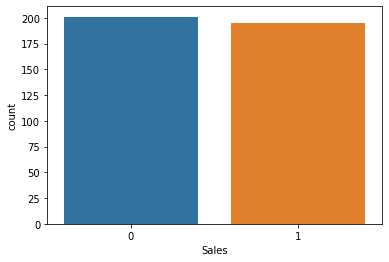

In [113]:
sns.countplot(data['Sales'])

In [114]:
#Dividing the data
x=data.iloc[:,1:]
y = data.iloc[:,0]

In [29]:
#normalize the data by MinMax scaller

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaling = MinMaxScaler()
X= scaling.fit_transform(x)

# Split data into train-test split

In [117]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size=0.2, random_state=40)

In [118]:
Xtrain.shape, Xtest.shape,ytrain.shape,ytest.shape

((316, 10), (80, 10), (316,), (80,))

# Building a model

In [119]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [120]:
#Predicting on test data
pred = model.predict(Xtest) # predicting on test data set 
pd.Series(pred).value_counts() # getting the count of each category 

1    54
0    26
dtype: int64

In [121]:
pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [123]:
model.score(Xtest, ytest)

0.6375

In [124]:
np.mean(pred==ytest)

0.6375

In [125]:
dataframe= pd.DataFrame({'ytest':ytest, 'predicted':pred})
dataframe

,ytest,predicted
142,1,1
135,1,1
77,1,1
233,1,0
118,1,0
...,...,...
197,0,0
322,0,1
371,1,1
285,1,0


In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [127]:
acc = accuracy_score(ytest, pred) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, pred)

Accuracy = 63.74999999999999


array([[17, 20],
       [ 9, 34]], dtype=int64)

In [128]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54        37
           1       0.63      0.79      0.70        43

    accuracy                           0.64        80
   macro avg       0.64      0.63      0.62        80
weighted avg       0.64      0.64      0.63        80



# Grid Search CV

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(3, 150)}]
model1= DecisionTreeClassifier()
estimator = model1

clf = GridSearchCV(estimator,tree_param, cv=10)
clf.fit(X,y)

print(clf.best_score_)
print(clf.best_params_)

0.75
{'criterion': 'entropy', 'max_depth': 145}


In [130]:
tree_param1 = [{'min_samples_split':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150],'min_samples_leaf':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150]}]
clf2= GridSearchCV(estimator,tree_param1, cv=10)
clf2.fit(X,y)
print(clf2.best_score_)
print(clf2.best_params_)

0.7653205128205128
{'min_samples_leaf': 5, 'min_samples_split': 10}


In [131]:
clf.best_params_,clf2.best_params_

({'criterion': 'entropy', 'max_depth': 145},
 {'min_samples_leaf': 5, 'min_samples_split': 10})

In [135]:
# modified model 
model_CV = DecisionTreeClassifier(criterion = 'entropy',max_depth=145,min_samples_leaf=5, min_samples_split= 10)
model_CV.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=145, min_samples_leaf=5,
                       min_samples_split=10)

In [136]:
#Predicting on test data
pred1= model_CV.predict(Xtest) # predicting on test data set 
pd.Series(pred1).value_counts() # getting the count of each category

0    47
1    33
dtype: int64

In [137]:
acc1 = accuracy_score(ytest, pred1) * 100
print("Accuracy =", acc1)
confusion_matrix(ytest, pred1)

Accuracy = 65.0


array([[28,  9],
       [19, 24]], dtype=int64)

In [138]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67        37
           1       0.73      0.56      0.63        43

    accuracy                           0.65        80
   macro avg       0.66      0.66      0.65        80
weighted avg       0.67      0.65      0.65        80



In [139]:
dataframe= pd.DataFrame({'ytest':ytest, 'predicted':pred1})
dataframe

,ytest,predicted
142,1,1
135,1,1
77,1,1
233,1,0
118,1,0
...,...,...
197,0,0
322,0,0
371,1,0
285,1,0


In [58]:
#Using Gini Model

In [140]:
model_CV1 = DecisionTreeClassifier(criterion = 'gini',max_depth=145,min_samples_leaf=5, min_samples_split=10)
model_CV1.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=145, min_samples_leaf=5, min_samples_split=10)

In [141]:
pred2=model_CV1.predict(Xtest)
pd.Series(pred2).value_counts()

0    50
1    30
dtype: int64

In [142]:
model_CV1.score(Xtest,ytest)

0.6375

In [143]:
acc2=accuracy_score(ytest,pred2)
print('Accuracy=',acc2)
confusion_matrix(ytest,pred2)

Accuracy= 0.6375


array([[29,  8],
       [21, 22]], dtype=int64)

In [144]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67        37
           1       0.73      0.51      0.60        43

    accuracy                           0.64        80
   macro avg       0.66      0.65      0.63        80
weighted avg       0.66      0.64      0.63        80



# model validation

In [154]:
# 1.Evaluate using a train and a test set

model_tt =DecisionTreeClassifier(criterion = 'entropy',max_depth=145,min_samples_leaf=5, min_samples_split= 10)
model_tt.fit(Xtrain,ytrain)
result = model_tt.score(Xtest,ytest)
result*100

65.0

In [156]:
# 2.Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds =10
seed = 200

kfold = KFold(n_splits=num_folds, random_state=None)
model_kfold = DecisionTreeClassifier(criterion = 'entropy',max_depth=145,min_samples_leaf=5, min_samples_split= 10)
result1 = cross_val_score(model_kfold, X,y, cv=kfold)

print(result1.mean()*100)
print(result1.std()*100)

74.75641025641025
8.08433725643232


In [157]:
# Evaluate using Leave One Out Cross Validation

from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model_LOO = DecisionTreeClassifier(criterion = 'entropy',max_depth=145,min_samples_leaf=5, min_samples_split= 10)
result2 = cross_val_score(model_LOO, X,y, cv=loocv)

print(result2.mean()*100.0)
print(result2.std()*100)

72.72727272727273
44.536177141512326


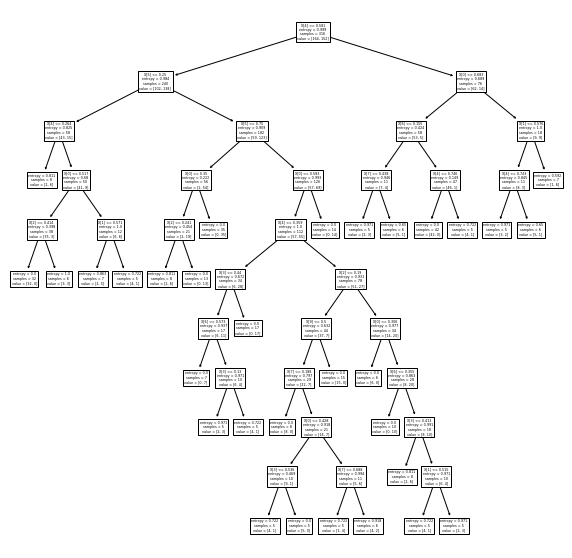

In [164]:
from sklearn import tree
plt.figure(figsize=(10,10))
model_L = DecisionTreeClassifier(criterion = 'entropy',max_depth=145,min_samples_leaf=5, min_samples_split= 10)
tree.plot_tree(model_L.fit(Xtrain,ytrain));

In [165]:
pred_L= model_L.predict(Xtest)
model_L.score(Xtest,ytest)

0.65